In [ ]:
#thêm các thư viện 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
palette = sns.color_palette("Spectral")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
%matplotlib inline


In [ ]:
from google.colab import drive 
drive.mount('/content/drive') #kết nối vào drive

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/winequality-red.csv')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#Kiểm tra 5 dòng dữ liệu đầu tiên
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#Thông tin về các cột dữ liệu
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: xlabel='quality', ylabel='fixed acidity'>

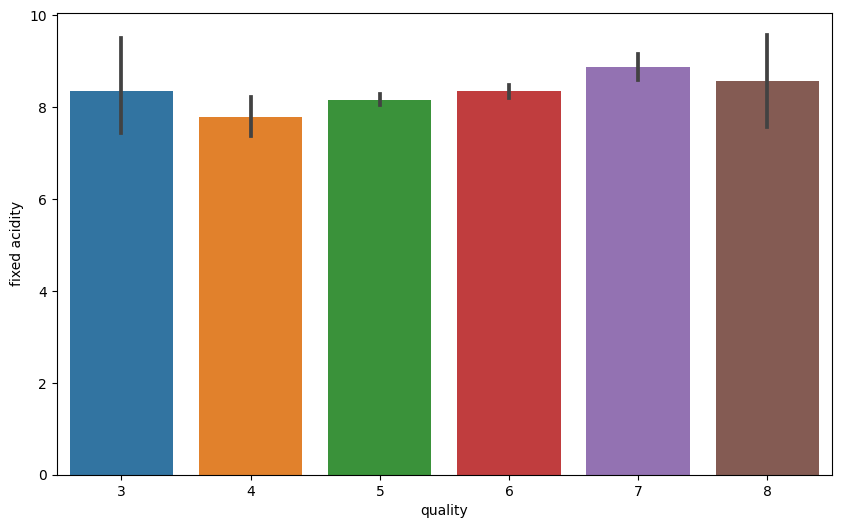

In [ ]:
###vẽ sơ đồ để biết các cột dữ liệu được phân bổ như thế nào trong tập dữ liệu

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
# Ở đây ta thấy axit cố định  không đưa ra quy cách nào để phân loại chất lượng

<Axes: xlabel='quality', ylabel='volatile acidity'>

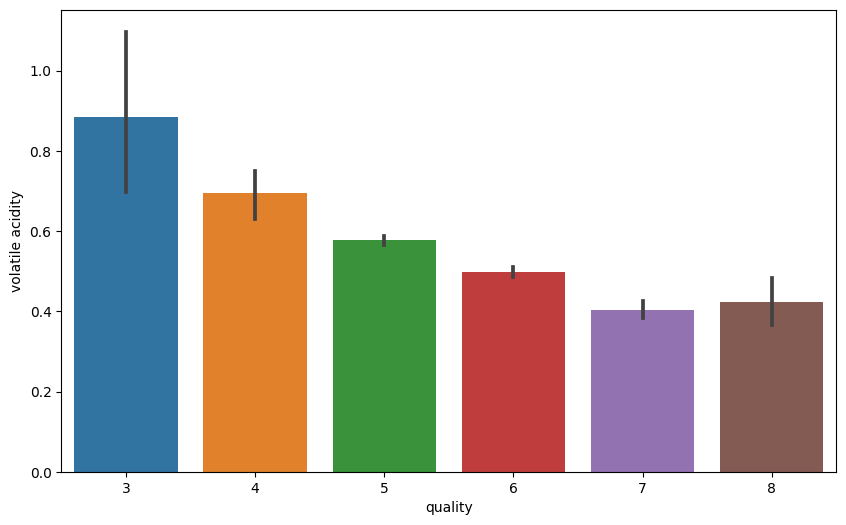

In [ ]:
#Ở đây chúng ta thấy rằng độ axit dễ bay hơi có xu hướng giảm dần khi chúng ta nâng cao chất lượng
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<Axes: xlabel='quality', ylabel='citric acid'>

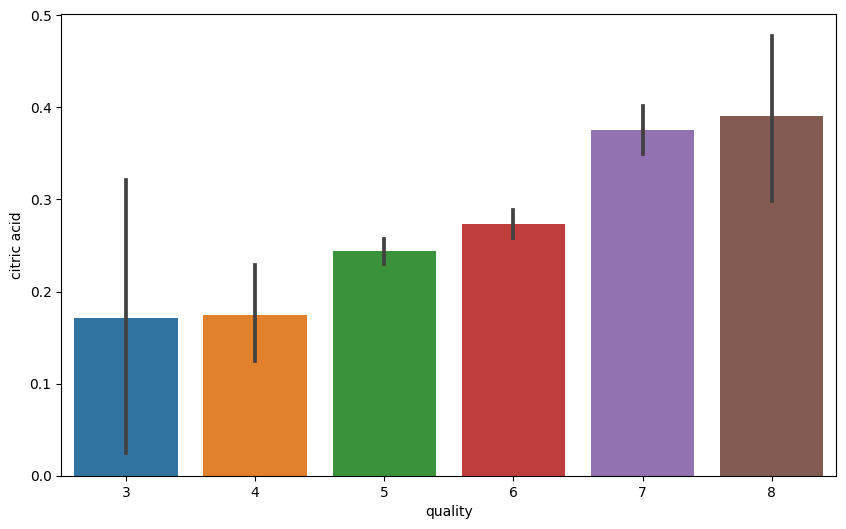

In [ ]:
#Thành phần axit citric càng cao thì chất lượng rượu càng cao
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

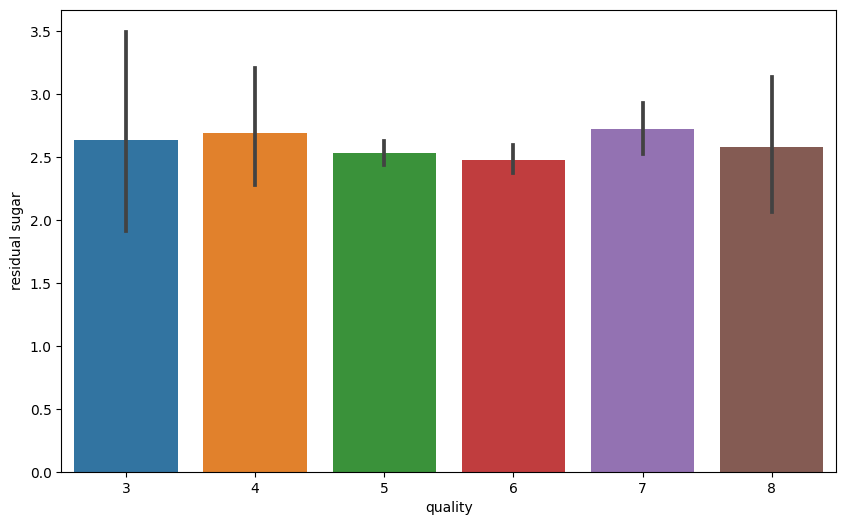

In [ ]:
#Lượng đường dư không đưa ra quy cách nào để phân loại chất lượng
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<Axes: xlabel='quality', ylabel='chlorides'>

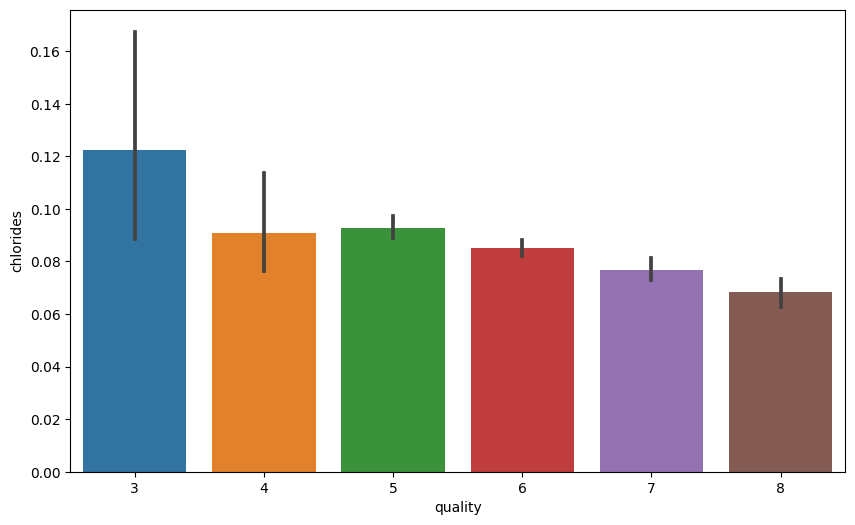

In [ ]:
#Thành phần clorua cũng giảm xuống khi chúng ta nâng cao chất lượng rượu vang
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

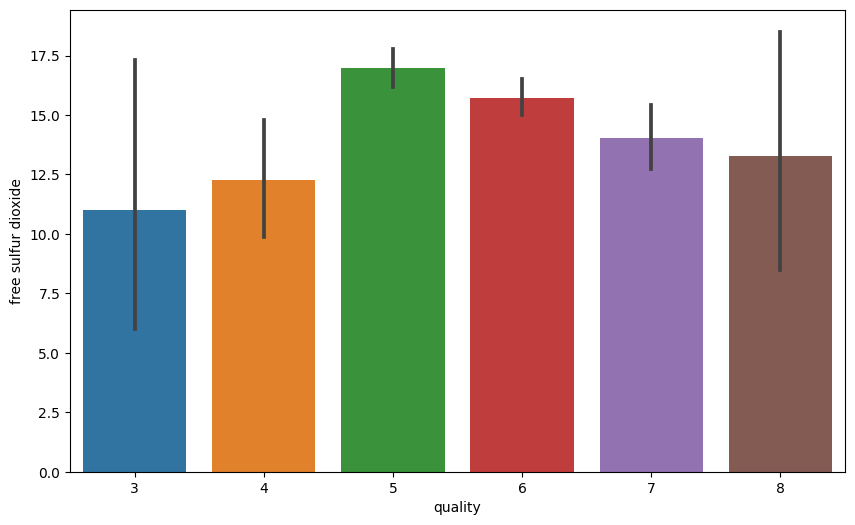

In [ ]:
#Thành phần sulfur dioxide tự do không đưa ra quy cách nào để phân loại chất lượng
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

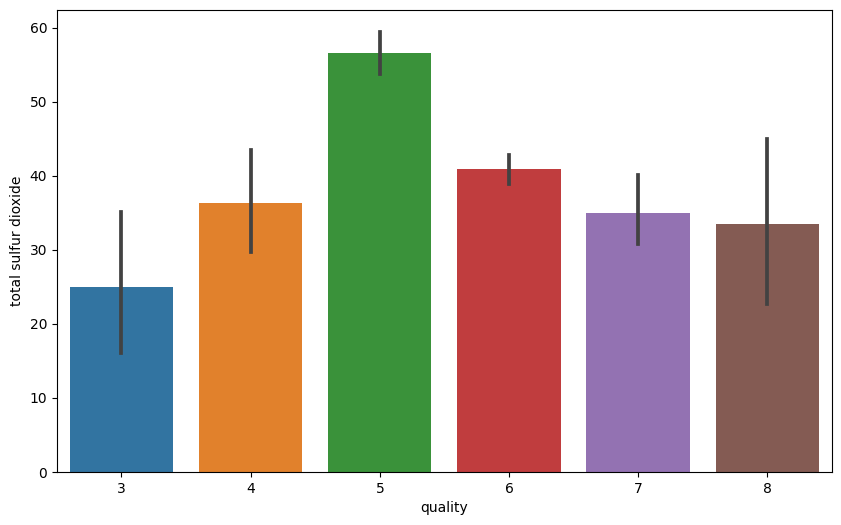

In [ ]:
#Thành phần tổng sulfur dioxide 8 không đưa ra quy cách nào để phân loại chất lượng
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<Axes: xlabel='quality', ylabel='sulphates'>

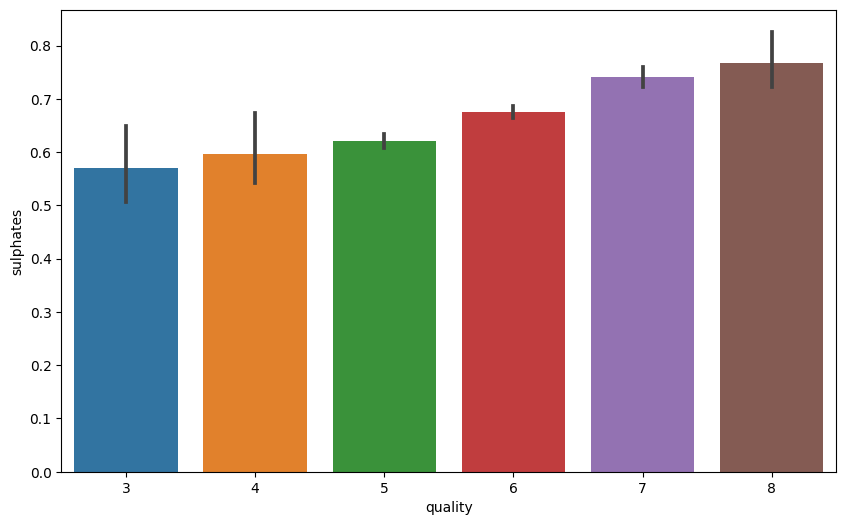

In [ ]:
#Mức độ Sunfat tăng cao cùng với chất lượng của rượu vang
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<Axes: xlabel='quality', ylabel='alcohol'>

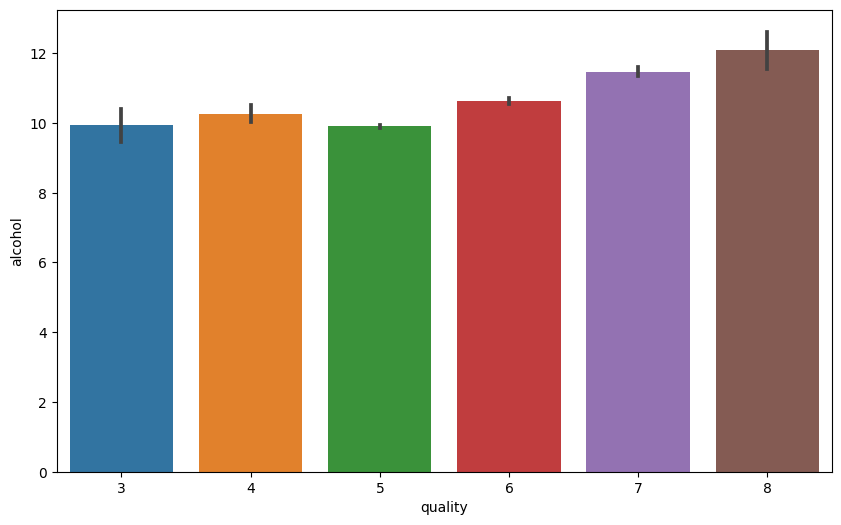

In [ ]:
# Độ cồn cũng tăng cao khi chất lượng rượu tăng
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

In [ ]:
###Tiền xử lý Dữ liệu để thực hiện thuật toán Machine learning

In [ ]:
#Sau khi đọc mô tả tập dữ liệu Chất lượng rượu vang đỏ, chất lượng > 6.5 là "tốt" chất lượng <6,5 là "xấu", Gán tốt -> 1 tệ ---> 0
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

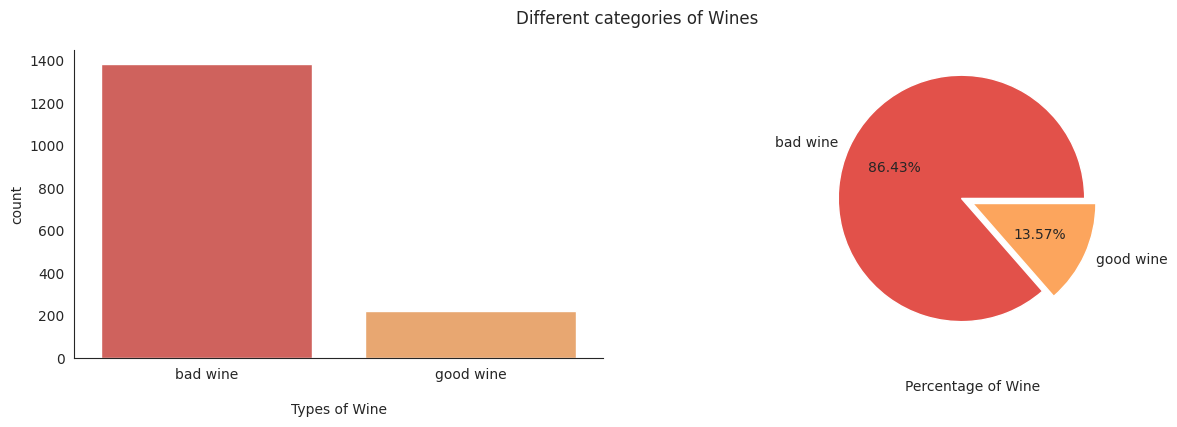

In [ ]:
#Biểu đồ thể hiện chất lượng rượu Good or Bad
sns.set_style("white")
plt.figure(figsize=(15, 4))

wineScale_insight = df['quality']

plt.subplot(1, 2, 1)
sns.countplot(df, x=wineScale_insight, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")


plt.subplot(1, 2, 2)
plt.pie(wineScale_insight.value_counts().values, labels=['bad wine', 'good wine'], autopct="%.2f%%", explode=[0.1, 0], colors=palette)
plt.xlabel("\nPercentage of Wine")

plt.suptitle('Different categories of Wines')
sns.despine()

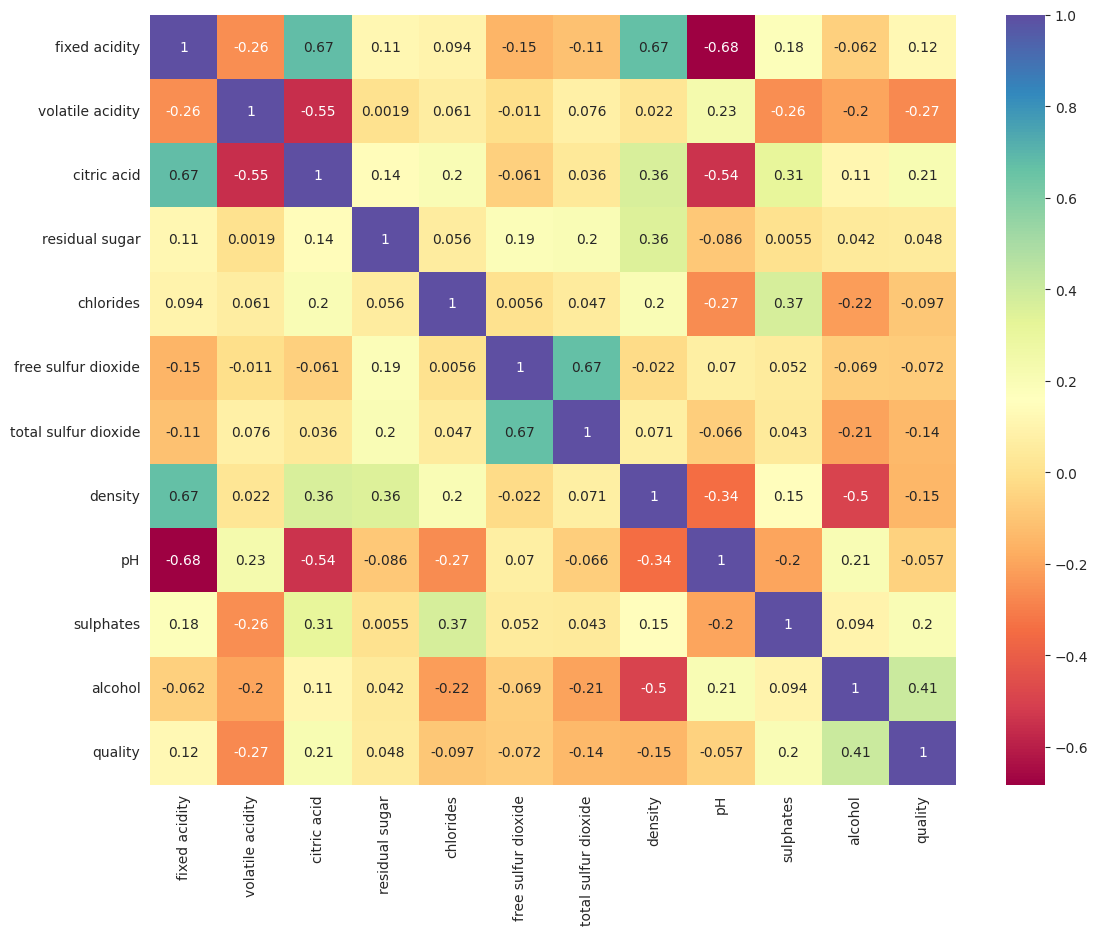

In [ ]:
#Biểu đồ Heatmap 
# mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Spectral)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:1507: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/a

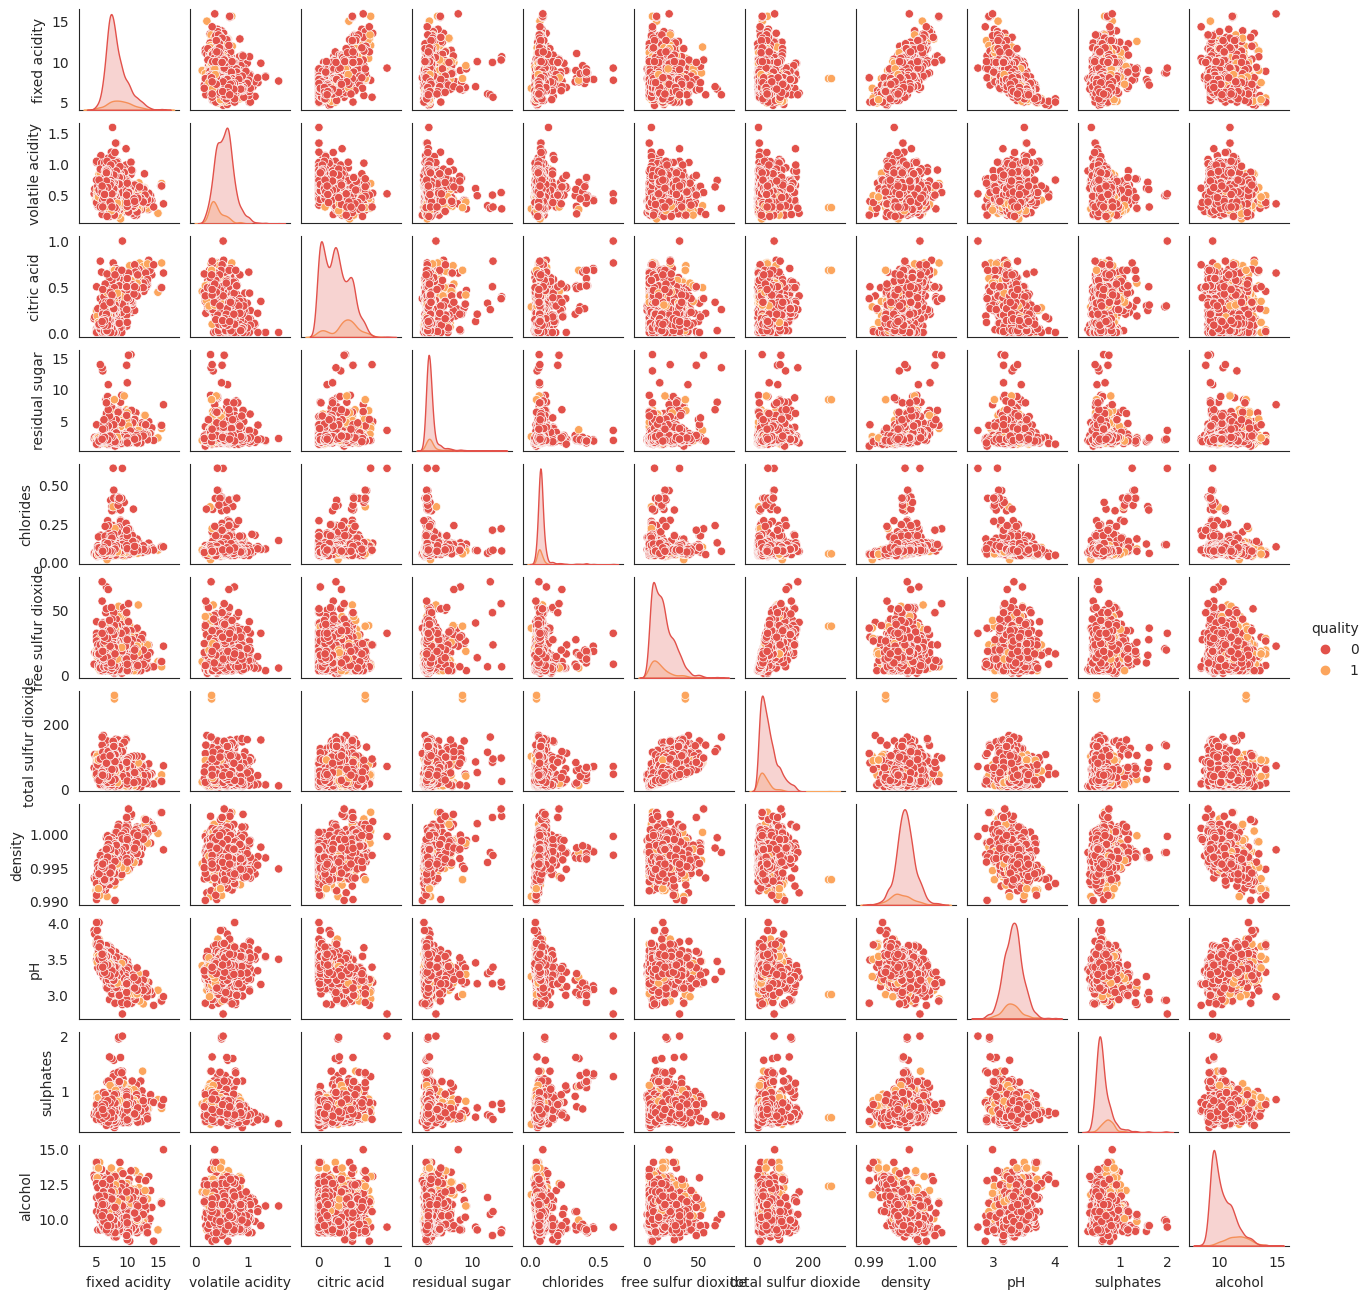

In [ ]:
#Mối quan hệ giữa các nội dung biến trong rượu vang đỏ
#Kiểm tra số lượng giá trị trong tập dữ liệu
sns.pairplot(wine, hue='quality', palette=palette, size=1.2, diag_kind = 'kde')
plt.show()

In [ ]:
### Chia dữ liệu thành X và Y
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [ ]:
#In ra X Y
print(X.shape, y.shape)


(1599, 11) (1599,)


In [ ]:
#Chia dữ liệu thành X_train, X_test, y_train, y_test với test_size = 0.20 sử dụng sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [ ]:
## In hình dạng của X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
#Áp dụng Chia tỷ lệ chuẩn để có kết quả tối ưu
sc = StandardScaler()


In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
rf = RF(n_estimators = 50, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("KẾT QUẢ:\n")
#Report
print('Random Forest Classifier report:\n\n{}\n'.format(classification_report(y_test, Y_pred_rf)))
res = cross_val_score(rf, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,rf.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(rf.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Random Forest Classifier report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       273
           1       0.75      0.38      0.51        47

    accuracy                           0.89       320
   macro avg       0.83      0.68      0.72       320
weighted avg       0.88      0.89      0.88       320


Độ chính xác trung bình:	0.8594

Độ lệch chuẩn:	0.0546

Ma trận nhầm lẫn:
[[267   6]
 [ 29  18]]

Độ chính xác:		89.06%


In [ ]:
Y_pred_rf = rf.predict(X_test)

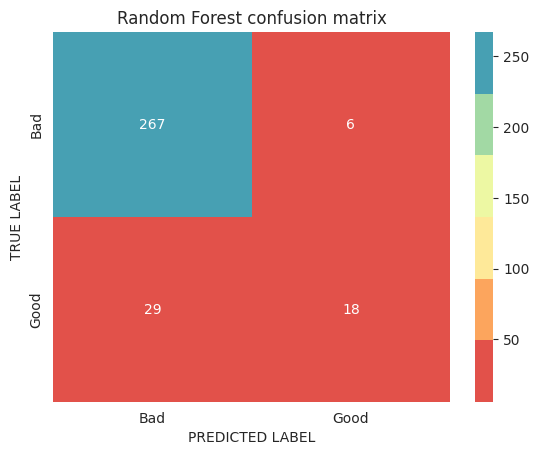

In [ ]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_rf)
cm_matrix = pd.DataFrame(data=cm, columns=['Bad', 'Good'], 
                                 index=['Bad', 'Good'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=palette)
plt.title('Random Forest confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL');

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


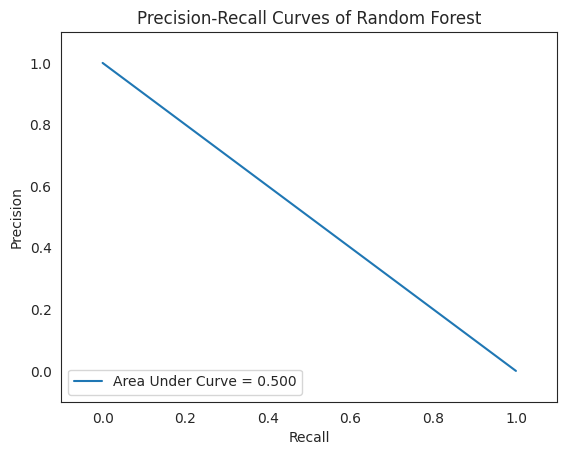

In [ ]:
#Đồ thị đường cong PR (Precision-Recall Curves)
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_rf,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
### Support Vector Machine Algorithm
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto", probability=True)
svm.fit(X_train,y_train)

SVC(gamma='auto', probability=True, random_state=42)

In [ ]:
Y_pred_svm = svm.predict(X_test)

In [ ]:
# IN MA TRẠN NHẦM LẪN VÀ CHIA NÓ THÀNH 4 PHẦN+
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred_svm)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[268   5]
 [ 35  12]]

True Positives(TP) =  268

True Negatives(TN) =  12

False Positives(FP) =  5

False Negatives(FN) =  35


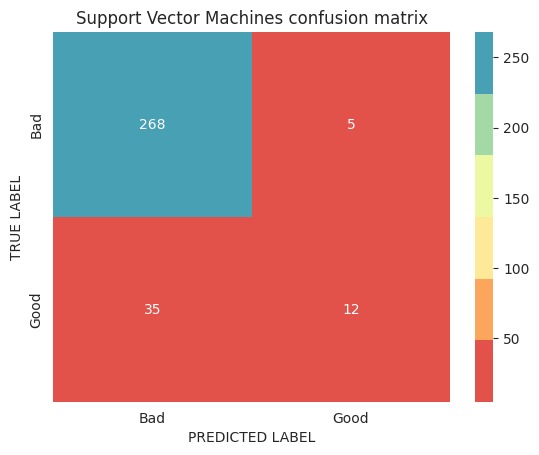

In [ ]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_svm)
cm_matrix = pd.DataFrame(data=cm, columns=['Bad', 'Good'], 
                                 index=['Bad', 'Good'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=palette)
plt.title('Support Vector Machines confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL'); 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
print("KẾT QUẢ:\n")
#Report
print('Support Vector Machines Classifier Report:\n\n{}\n'.format(classification_report(y_test, Y_pred_svm)))
res = cross_val_score(svm, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,svm.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(svm.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Support Vector Machines Classifier Report:

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320


Độ chính xác trung bình:	0.8531

Độ lệch chuẩn:	0.0344

Ma trận nhầm lẫn:
[[268   5]
 [ 35  12]]

Độ chính xác:		87.5%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


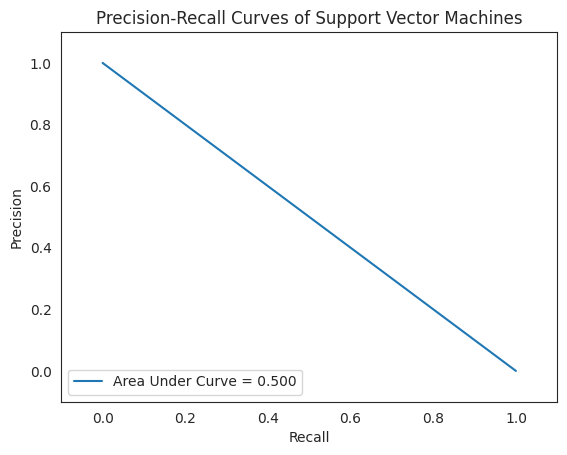

In [ ]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_svm,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Support Vector Machines')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
### Decision Tree

from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
Y_pred_dt = dt.predict(X_test)


In [ ]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Đánh giá mô hình bằng cách sử dụng dữ liệu thử nghiệm
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

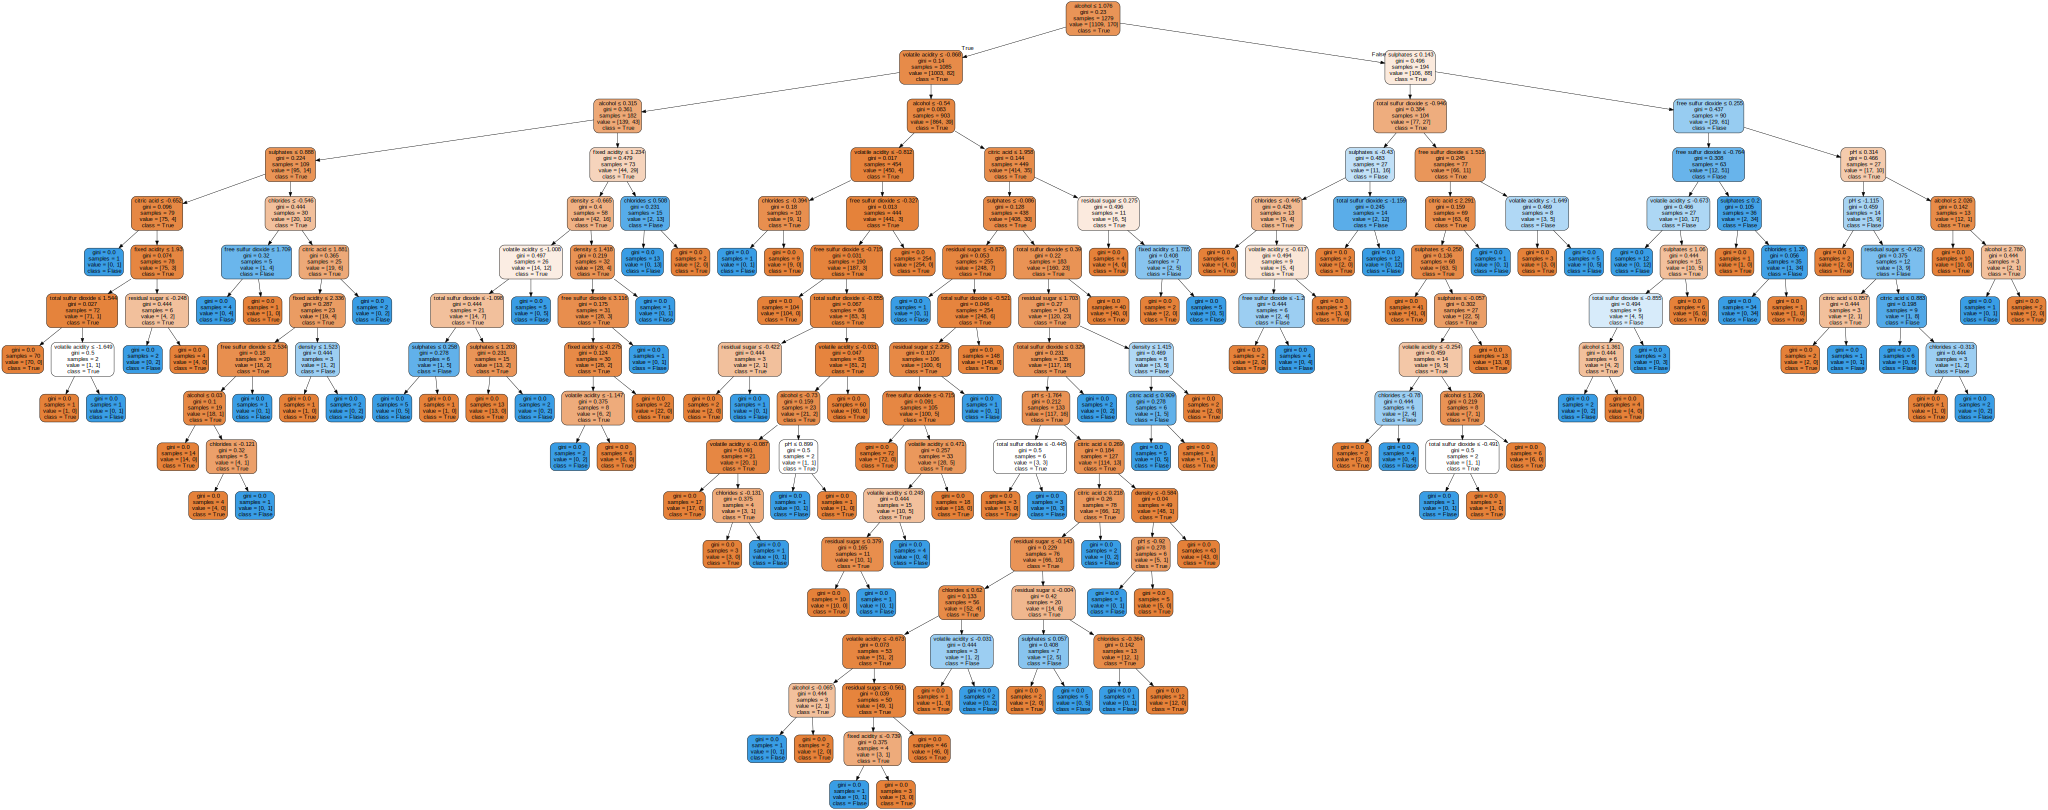

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import DecisionTreeClassifier as clf
Y_name = ['True','Flase']
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Y_pred_dt = clf.predict(X_test)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(filename='DecisionTree')
graph

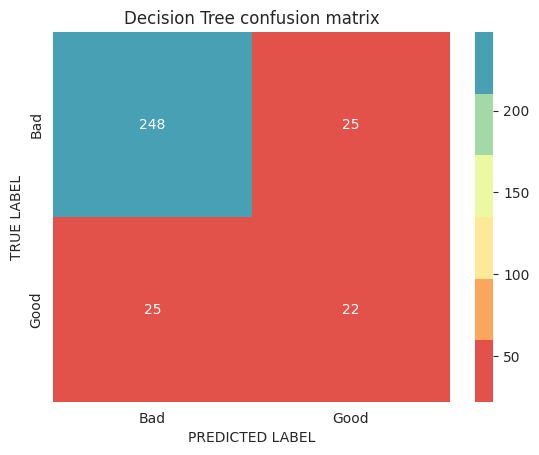

In [ ]:
# Trực quan hóa sơ đồ nhầm lẫn với with ma trận mã hóa màu
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, Y_pred_dt)
cm_matrix = pd.DataFrame(data=cm, columns=['Bad', 'Good'], 
                                 index=['Bad', 'Good'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=palette)
plt.title('Decision Tree confusion matrix') 
plt.ylabel('TRUE LABEL') 
plt.xlabel('PREDICTED LABEL'); 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
print("KẾT QUẢ:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(y_test, Y_pred_dt)))
res = cross_val_score(dt, X_test, y_test, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Độ chính xác trung bình:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Độ lệch chuẩn:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Ma trận nhầm lẫn:\n{}\n'.format(confusion_matrix(y_test,dt.predict(X_test))))
#Điểm chính xác
print("Độ chính xác:\t\t{}%".format(round(dt.score(X_test, y_test)*100, 2)))

KẾT QUẢ:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       273
           1       0.47      0.47      0.47        47

    accuracy                           0.84       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.84      0.84      0.84       320


Độ chính xác trung bình:	0.8125

Độ lệch chuẩn:	0.0504

Ma trận nhầm lẫn:
[[248  25]
 [ 24  23]]

Độ chính xác:		84.69%


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


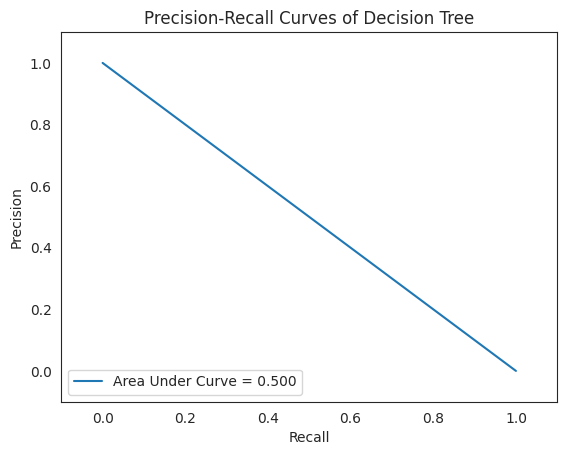

In [ ]:
#Đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(y_test, Y_pred_dt,pos_label=2)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
#plt.savefig("svmpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()